<a href="https://colab.research.google.com/github/Vsevolod245/CV_MAI_2023/blob/main/HW4_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tasks.txt

Задание 1: В папке находится изображение railway.jpeg с железной дорогой, уходящей вдаль от камеры. Необходимо, используя перспективное преобразование, развернуть дорогу таким образом, чтобы она была непосредственно перед нами.

Пример результата с подсказкой содержит изображение railway_result.png.

Подсказка 2: чтобы было легче определять координаты ключевых точек изображения, отобразите его с помощью plt.imshow(img) (!не в ноутбуке) - в правом нижнем углу открытого окна будут отображаться координаты пикселей, на которые Вы наводите мышкой.

Задание 2: В папке находится изображение palm.png с пальмой. Используя классические аффинные преобразования, необходимо создать "тень" для этой пальмы и отрисовать ее с ней на одном рисунке. Пример результата находится в изображении palm_result.png


---



In [5]:
import sys
import cv2
import matplotlib.pyplot as plt
from urllib.request import urlopen
import numpy as np

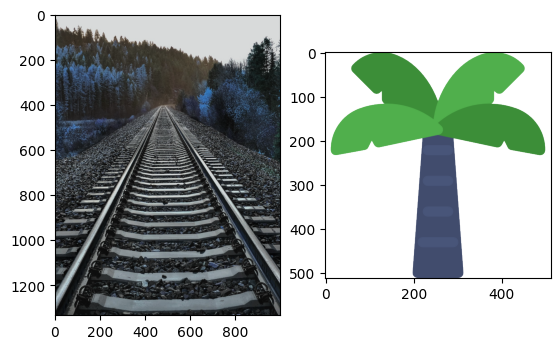

In [6]:
# загружаем картинки
req1 = urlopen('https://i.imgur.com/jQeZs0r.jpg')
arr1 = np.asarray(bytearray(req1.read()), dtype=np.uint8)
img_railway = cv2.imdecode(arr1, -1)
req2 = urlopen('https://i.imgur.com/eiekZrT.png')
arr2 = np.asarray(bytearray(req2.read()), dtype=np.uint8)
img_palm = cv2.imdecode(arr2, -1)
plt.subplot(1, 2, 1)
plt.imshow(img_railway)
plt.subplot(1, 2, 2)
plt.imshow(img_palm)



---


Задание 1

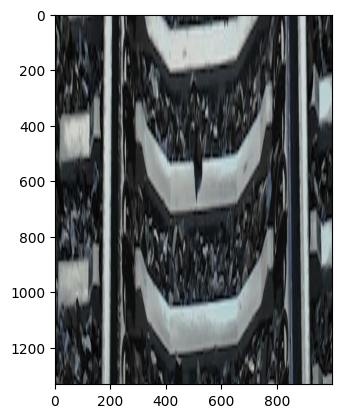

In [7]:
height, width = img_railway.shape[:2]
pts1 = np.float32([[125, 800], [830, 800],[50, 900], [900, 900]])
pts2 = np.float32([[0, 0], [width, 0],[0, height],[width, height]])
M = cv2.getPerspectiveTransform(np.float32(pts1), np.float32(pts2))
dst = cv2.warpPerspective(img_railway, M, (width, height))
plt.imshow(dst)



---


Задание 2


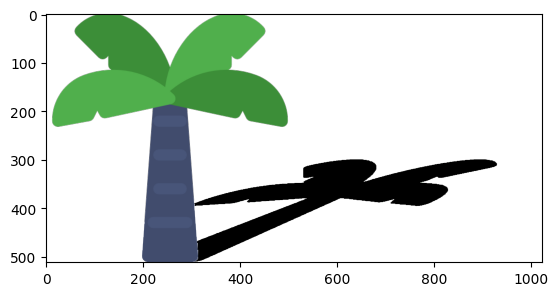

In [8]:
height, width = img_palm.shape[:2]
img_palm_copy = np.zeros((height, width * 2, 4), np.uint8)
img_palm_copy.fill(255)
img_palm_copy[0:height, 0:width, :] = img_palm
pts1 = np.float32([[0, 0], [width, 0], [0, height]])
pts2 = np.float32([[width, 300], [width * 2, 300],[0, height]])
M = cv2.getAffineTransform(pts1,pts2)
dst = cv2.warpAffine(img_palm_copy, M, (int(width*2),height))
dst[dst != 255] = 0
img_palm_shadow = dst.copy()
for x in range(img_palm.shape[0]):
    for y in range(img_palm.shape[1]):
        if (img_palm[x,y][2] != 255).all():
            img_palm_shadow[x,y] = img_palm[x,y]
plt.imshow(img_palm_shadow)